In [ ]:
from google.colab import files
uploaded = files.upload()


Saving assesments.csv to assesments.csv
Saving studentAssesment.csv to studentAssesment.csv
Saving studentcourse.csv to studentcourse.csv
Saving studentinfo.csv to studentinfo.csv
Saving studentRegistration.csv to studentRegistration.csv
Saving studentVLE.csv to studentVLE.csv


In [2]:
import pandas as pd

# Load datasets
course_df = pd.read_csv('studentcourse.csv')
assessment_df = pd.read_csv('studentAssesment.csv')
assessments_df = pd.read_csv('assesments.csv')
registration_df = pd.read_csv('studentRegistration.csv')
vle_df = pd.read_csv('studentVLE.csv')
info_df = pd.read_csv('studentinfo.csv')  # If distinct

# Show first few rows of each
dfs = {
    "Course": course_df,
    "Assessment": assessment_df,
    "Assessments": assessments_df,
    "Registration": registration_df,
    "VLE": vle_df,
    "Info": info_df
}

for name, df in dfs.items():
    print(f"\n{name} DataFrame:")
    display(df.head())



Course DataFrame:


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240



Assessment DataFrame:


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79



Assessments DataFrame:


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0



Registration DataFrame:


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,NaN
1,AAA,2013J,28400,-53,NaN
2,AAA,2013J,30268,-92,12.0
3,AAA,2013J,31604,-52,NaN
4,AAA,2013J,32885,-176,NaN



VLE DataFrame:


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN



Info DataFrame:


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [3]:
from sklearn.preprocessing import LabelEncoder

def clean_data(df):
    # Drop duplicates
    df = df.drop_duplicates()

    # Handle missing values
    df = df.fillna(method='ffill').fillna(method='bfill')  # forward/backward fill

    # Encode categorical columns
    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    return df

# Clean each DataFrame
cleaned_dfs = {}
for name, df in dfs.items():
    cleaned_dfs[name] = clean_data(df.copy())
    print(f"{name} cleaned successfully.")


Course cleaned successfully.
Assessment cleaned successfully.
Assessments cleaned successfully.
Registration cleaned successfully.
VLE cleaned successfully.
Info cleaned successfully.


<ipython-input-3-c2181e84d6de>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')  # forward/backward fill
<ipython-input-3-c2181e84d6de>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')  # forward/backward fill
<ipython-input-3-c2181e84d6de>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')  # forward/backward fill
<ipython-input-3-c2181e84d6de>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')  # forward/backward f


Course Summary:


,code_module,code_presentation,module_presentation_length
count,22.000000,22.000000,22.000000
mean,3.181818,1.772727,255.545455
std,1.967265,1.066004,13.654677
min,0.000000,0.000000,234.000000
25%,1.250000,1.000000,241.000000
50%,3.000000,2.000000,261.500000
75%,5.000000,3.000000,268.000000
max,6.000000,3.000000,269.000000



Assessment Summary:


,id_assessment,id_student,date_submitted,is_banked,score
count,99.0,99.000000,99.000000,99.0,99.000000
mean,1752.0,142291.515152,19.545455,0.0,71.454545
std,0.0,60715.610640,5.012785,0.0,9.440763
min,1752.0,11391.000000,9.000000,0.0,45.000000
25%,1752.0,102293.500000,18.000000,0.0,65.500000
50%,1752.0,145130.000000,19.000000,0.0,72.000000
75%,1752.0,184855.000000,19.000000,0.0,78.500000
max,1752.0,242793.000000,54.000000,0.0,88.000000



Assessments Summary:


,code_module,code_presentation,id_assessment,assessment_type,date,weight
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,1.585859,1.444444,18205.383838,1.272727,122.949495,22.828283
std,1.000103,1.108614,8191.334266,0.901452,68.237187,29.957041
min,0.000000,0.000000,1752.000000,0.000000,12.000000,0.000000
25%,1.000000,0.000000,14996.500000,0.000000,54.000000,5.000000
50%,1.000000,1.000000,15021.000000,2.000000,123.000000,17.500000
75%,2.500000,2.000000,25335.500000,2.000000,190.500000,20.000000
max,3.000000,3.000000,40088.000000,2.000000,261.000000,100.000000



Registration Summary:


,code_module,code_presentation,id_student,date_registration,date_unregistration
count,99.0,99.0,99.000000,99.000000,99.000000
mean,0.0,0.0,138601.555556,-82.414141,108.050505
std,0.0,0.0,59372.661207,50.217488,56.630628
min,0.0,0.0,11391.000000,-197.000000,12.000000
25%,0.0,0.0,101337.000000,-109.000000,60.000000
50%,0.0,0.0,142326.000000,-67.000000,123.000000
75%,0.0,0.0,183521.500000,-45.000000,166.000000
max,0.0,0.0,240884.000000,5.000000,191.000000



VLE Summary:


,id_site,code_module,code_presentation,activity_type,week_from,week_to
count,99.000000,99.0,99.0,99.000000,0.0,0.0
mean,546856.313131,0.0,0.0,5.525253,NaN,NaN
std,141.810714,0.0,0.0,1.573657,NaN,NaN
min,546614.000000,0.0,0.0,0.000000,NaN,NaN
25%,546703.000000,0.0,0.0,5.000000,NaN,NaN
50%,546897.000000,0.0,0.0,6.000000,NaN,NaN
75%,546989.000000,0.0,0.0,6.000000,NaN,NaN
max,547066.000000,0.0,0.0,8.000000,NaN,NaN



Info Summary:


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
count,99.0,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0,99.000000,99.000000,99.000000
mean,0.0,0.0,138601.555556,0.636364,5.323232,0.777778,5.121212,0.555556,0.0,90.555556,0.050505,2.040404
std,0.0,0.0,59372.661207,0.483494,3.859333,0.898474,2.627456,0.575383,0.0,63.164383,0.220099,0.604730
min,0.0,0.0,11391.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,60.000000,0.000000,0.000000
25%,0.0,0.0,101337.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.0,60.000000,0.000000,2.000000
50%,0.0,0.0,142326.000000,1.000000,5.000000,1.000000,5.000000,1.000000,0.0,60.000000,0.000000,2.000000
75%,0.0,0.0,183521.500000,1.000000,9.000000,1.000000,7.000000,1.000000,0.0,105.000000,0.000000,2.000000
max,0.0,0.0,240884.000000,1.000000,12.000000,3.000000,9.000000,2.000000,0.0,420.000000,1.000000,3.000000


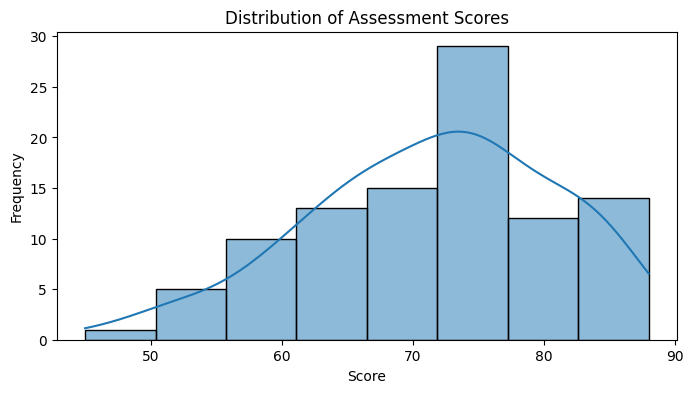

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
for name, df in cleaned_dfs.items():
    print(f"\n{name} Summary:")
    display(df.describe())

# Visualize distribution of scores (example: assessment_df)
plt.figure(figsize=(8, 4))
sns.histplot(assessment_df['score'], kde=True)
plt.title('Distribution of Assessment Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [5]:
# 1. Average Score Per Module
merged_df = assessment_df.merge(assessments_df, on='id_assessment')
avg_score = merged_df.groupby('code_module')['score'].mean().reset_index()
print("\nAverage score per module:")
display(avg_score)

# 2. Registration vs Dropout (if date_unregistration present)
if 'date_unregistration' in registration_df.columns:
    registration_df['dropped'] = registration_df['date_unregistration'].notnull()
    dropout_rate = registration_df.groupby('code_module')['dropped'].mean().reset_index()
    print("\nDropout Rate per Module:")
    display(dropout_rate)



Average score per module:


,code_module,score
0,AAA,71.454545



Dropout Rate per Module:


,code_module,dropped
0,AAA,0.171717


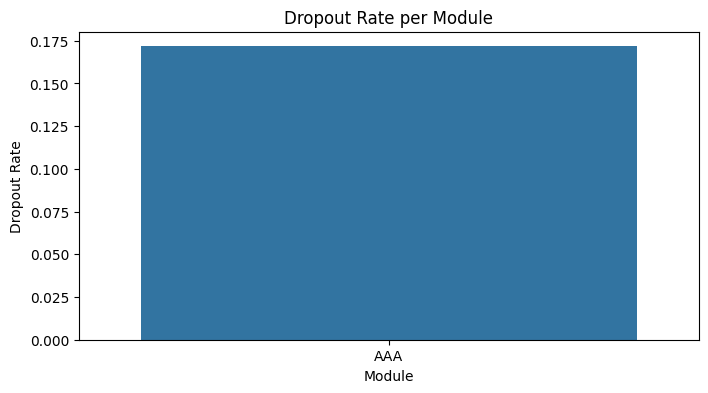

In [6]:
# Final visual: dropout rate per module
if 'dropped' in registration_df.columns:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=dropout_rate, x='code_module', y='dropped')
    plt.title('Dropout Rate per Module')
    plt.ylabel('Dropout Rate')
    plt.xlabel('Module')
    plt.show()
